In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#costume classes
from preprocessing import tokenize_data

In [2]:
#loading the data
# with open('yelp_academic_dataset_review.json', encoding='utf-8') as f:
#     df_review = pd.DataFrame(json.loads(line) for line in f)
df_review = pd.read_json('REVIEWS_DATA_SET_26K_EN.json')
df_review.head(2)

,text,rating
0,Stopped off here as we were looking for somewh...,3
1,What a great restaurant. We went to go see the...,5


In [3]:
df_review.shape

(26633, 2)

<AxesSubplot:ylabel='Frequency'>

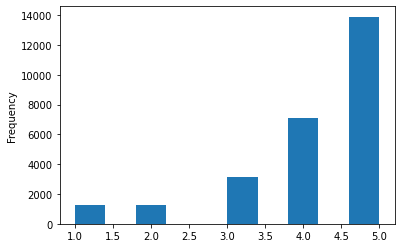

In [4]:
#plotting the rating distrubution
figure = plt.figure()

axes = figure.add_subplot(1, 1, 1)
axes.set_ylabel('Frequancy')

# df_review['stars'].plot.hist()
df_review['rating'].plot.hist()

In [5]:
# converting rating to 1/0 which is positive/negative into a new cloumn called stars
df_review['stars'] = df_review['rating'].apply(lambda x:1 if x >= 3 else 0 if x <= 2 else None)
df_review.dropna(axis=0, inplace=True)
df_review.head(5)

,text,rating,stars
0,Stopped off here as we were looking for somewh...,3,1
1,What a great restaurant. We went to go see the...,5,1
2,"Boy, am I glad I got to try Da Marino before t...",5,1
3,We found this gem during our mini trip to expe...,5,1
4,Donna the bartender is amazing. She is a hard ...,5,1


<BarContainer object of 2 artists>

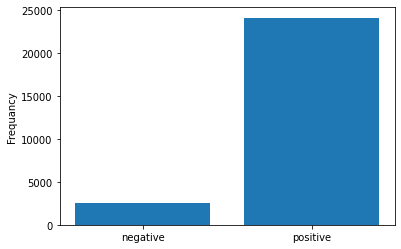

In [6]:
# plotting the pos/neg distrubution
plt.figure()

plt.ylabel('Frequancy')
plt.xticks([1, 0],['positive','negative'])

plt.bar([1, 0], df_review['stars'].value_counts())

In [7]:
from collections import Counter
from preprocessing import tokenize_data
reviews_strings = list(df_review['text'])
labels = list(df_review['stars'])
reviews_arrays, labels = tokenize_data(reviews_strings, labels, Counter(), lebals_encoded=True)
reviews_strings = None
labels = None

In [8]:
df_review['lengths'] = [len(reviews) for reviews in reviews_arrays]
reviews_arrays = None
df_review

,text,rating,stars,lengths
0,Stopped off here as we were looking for somewh...,3,1,109
1,What a great restaurant. We went to go see the...,5,1,54
2,"Boy, am I glad I got to try Da Marino before t...",5,1,205
3,We found this gem during our mini trip to expe...,5,1,146
4,Donna the bartender is amazing. She is a hard ...,5,1,32
...,...,...,...,...
26628,They have really a good burger using a good qu...,3,1,19
26629,High price .. bad food tast and quality ..heav...,1,0,20
26630,This was a nice sit down restaurant with food ...,2,0,213
26631,"I went for a dinner Sunday, reservation at 7:0...",1,0,235


In [9]:
#sorting the values by the label so that the positive (1)
# df_review = df_review.sort_values(by=['stars', 'lengths'], ascending=[False, False])
df_review = df_review.sort_values(by='stars', ascending=False)
df_review

,text,rating,stars,lengths
0,Stopped off here as we were looking for somewh...,3,1,109
16974,"The food is really good, salad bar have many o...",5,1,33
17000,It is good but not unique they don't make pas...,4,1,28
16999,Food was nice and delicious Lunch offers are ...,4,1,23
16998,"Liked the taste of steak and salmon, good rest...",4,1,30
...,...,...,...,...
2209,"We found a place close to Book of Mormon, it i...",2,0,115
5024,After doing lots of research and poring over N...,1,0,348
8198,we went there with a party of 5 european trave...,2,0,107
20647,Generally the atmosphere is very good. You can...,2,0,28


In [10]:
def balance_distrubution(df, pos_percentage = 0.5):
    if df['stars'].sum(axis=0)/len(df) < pos_percentage:
        print('positive percentage is already below {}%'.format(pos_percentage*100))
        return
    
    df = df.reset_index(drop=True) 
    #taking an estimation of 1% if the total length of the dataframe
    step = int(len(df)/100)
    
    for i in range(0, df.shape[0], step):
        #dropping the amount of step of entries until the pos_percentage reaches 1% obave it
        #so that no more data than required would be deleted
        if (df['stars'].sum(axis=0)/len(df)) > (pos_percentage+0.02):
            df.drop(df.index[0:step], axis=0, inplace=True)
            df = df.reset_index(drop=True)
            print(df['stars'].sum(axis=0)/len(df))
        elif (df['stars'].sum(axis=0)/len(df)) > pos_percentage:
            #taking an estimation of the remaining data and dropping them
            #taking the positive reviews from the end to get rid of very short reviews
            remaining_data = int(((df['stars'].sum(axis=0)/len(df)) - pos_percentage) * len(df))
            postive_last_index = int(len(df)/2)-remaining_data
            df.drop(df.index[postive_last_index-remaining_data:postive_last_index], axis=0, inplace=True)
            df = df.reset_index(drop=True)  
            print(df['stars'].sum(axis=0)/len(df))
            #dropping entries one by one until it reaches pos_percentage 
            for i in range(df.shape[0]):
                if (df['stars'].sum(axis=0)/len(df)) > pos_percentage:
                    df.drop(df.index[0], axis=0, inplace=True)
                    df = df.reset_index(drop=True)
                    print(df['stars'].sum(axis=0)/len(df))
                else:
                    break        
        elif (df['stars'].sum(axis=0)/len(df)) == pos_percentage:        
            return df
        
        else:
            raise Exception()

In [11]:
balance_distrubution(df_review, pos_percentage=0.95)

positive percentage is already below 95.0%


In [12]:
df_review = balance_distrubution(df_review, pos_percentage=0.5)

0.9057154776804339
0.9047546071031761
0.9037739500677375
0.9027728890453284
0.9017507805398569
0.9007069537085114
0.8996407088934641
0.8985513160579474
0.8974380131193531
0.8963000041713595
0.8951364575863668
0.8939465039887377
0.8927292340884574
0.8914836963638745
0.8902088945811067
0.8889037851365241
0.8875672742074081
0.886198214694438
0.8847954029380416
0.8833575751888518
0.8818834038105193
0.8803714931908956
0.8788203753351207
0.8772285051113635
0.8755942551168493
0.8739159101283157
0.8721916610971159
0.8704195986447746
0.8685977060098314
0.8667238513911971
0.8647957796269103
0.8628111031400033
0.860767292075049
0.8586616635397123
0.8564913698551059
0.8542533857067479
0.8519444940742065
0.8495612708018154
0.8471000676548374
0.844556993684737
0.8419278947033764
0.8392083306383804
0.8363935505100362
0.8334784647330699
0.8304576144036009
0.8273251371813573
0.8240747293185195
0.8206996033177064
0.8171924406206339
0.8135453386334658
0.809749751281855
0.8057964221545192
0.80167530913442

In [13]:
#making sure the dataframe has been modified and to see the amount of data lost
#original number of rows is 26633 
print(df_review.shape)
print(f'the number of entries lost: {26633-df_review.shape[0]}')

(4972, 4)
the number of entries lost: 21661


<BarContainer object of 2 artists>

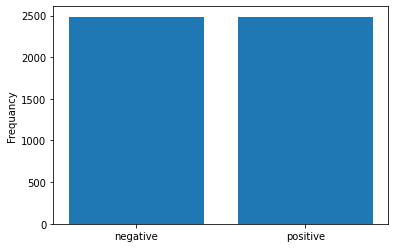

In [14]:
#plot to make sure the distrubution is the balanced
plt.figure()

plt.ylabel('Frequancy')
plt.xticks([1, 0],['positive','negative'])

plt.bar([1, 0],df_review['stars'].value_counts())

In [15]:
df_review

,text,rating,stars,lengths
0,I was extremely impressed by Mohamed Ali Taala...,5,1,37
1,"Very nice food, very nice service especially A...",5,1,19
2,Nisce service from ABHISHEK and delicious food...,5,1,30
3,Thank you so much for good delicious food and ...,5,1,20
4,"Superb venue, very friendly, welcoming, and ef...",5,1,89
...,...,...,...,...
4967,"We found a place close to Book of Mormon, it i...",2,0,115
4968,After doing lots of research and poring over N...,1,0,348
4969,we went there with a party of 5 european trave...,2,0,107
4970,Generally the atmosphere is very good. You can...,2,0,28


avarege length is 91.14581657280772


<AxesSubplot:ylabel='Frequency'>

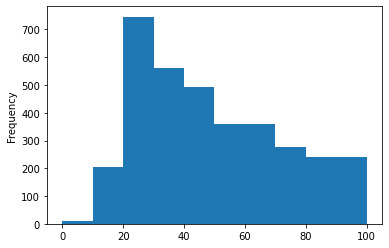

In [16]:
#plotting the length of the reviews
print('avarege length is', df_review['lengths'].mean())

df_review['lengths'].plot.hist(range=(0,100))

In [17]:
#printing the precentage of positive entries
print('distrubution (precentage of positive data): {} %'.format((df_review['stars'].sum(axis=0)/df_review.shape[0])*100))

distrubution (precentage of positive data): 50.0 %


In [18]:
df_review.drop(['lengths', 'stars'], axis=1, inplace=True)
df_review.head(5)

,text,rating
0,I was extremely impressed by Mohamed Ali Taala...,5
1,"Very nice food, very nice service especially A...",5
2,Nisce service from ABHISHEK and delicious food...,5
3,Thank you so much for good delicious food and ...,5
4,"Superb venue, very friendly, welcoming, and ef...",5


<AxesSubplot:ylabel='Frequency'>

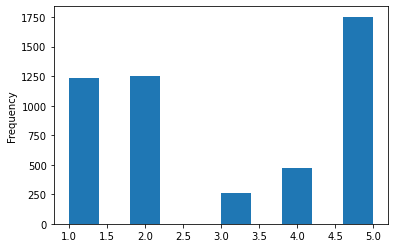

In [19]:
#plotting the rating distrubution
figure = plt.figure()

axes = figure.add_subplot(1, 1, 1)
axes.set_ylabel('Frequancy')

# df_review['stars'].plot.hist()
df_review['rating'].plot.hist()

In [24]:
#saving the data to be used later on
df_review.to_pickle('google_balanced.pkl')
df_review.to_csv('google_balanced.csv')
df_review.to_json('google_balanced.json',orient='records')

In [25]:
df1 = pd.read_pickle('google_balanced.pkl')
df1.head(10)

,text,rating
0,I was extremely impressed by Mohamed Ali Taala...,5
1,"Very nice food, very nice service especially A...",5
2,Nisce service from ABHISHEK and delicious food...,5
3,Thank you so much for good delicious food and ...,5
4,"Superb venue, very friendly, welcoming, and ef...",5
5,"When we walked in this morning, my wife made a...",5
6,The visit to Al Orjouan started from the very ...,5
7,Every thing was amazing and the food was great...,5
8,The food was excellent and service also amazin...,5
9,"Nice restaurant and excellent service, the foo...",5
